## Credit Risk Assessment with Logistic Regression

https://medium.com/@evelyn.eve.9512/credit-risk-analysis-with-machine-learning-5fc4fbe06a99  
https://medium.com/@carlosrodrigo.coelho/logistic-regression-pytorch-956f96b28010

In [1]:
import kagglehub
import pandas as pd
import numpy  as np
import seaborn as sb
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
path = kagglehub.dataset_download("nanditapore/credit-risk-analysis")

In [3]:
credit_data = pd.read_csv(path+'/credit_risk.csv')

In [4]:
credit_data.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [5]:
len(credit_data)

32581

In [6]:
credit_data = credit_data.dropna()

In [7]:
len(credit_data)

28638

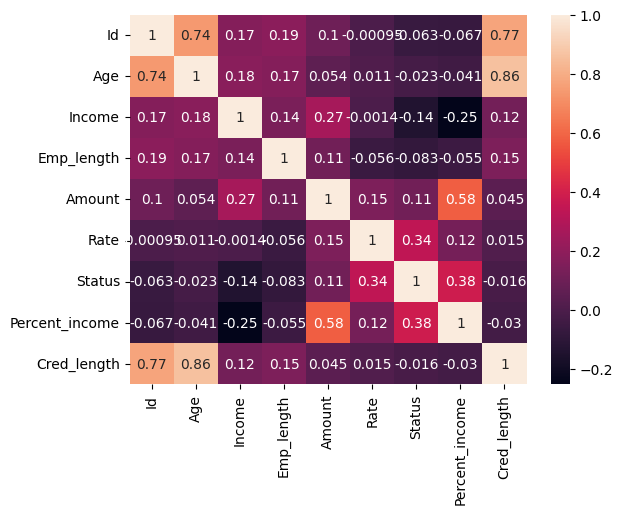

In [8]:
dataplot = sb.heatmap(credit_data.corr(numeric_only=True), annot=True)

In [9]:
features = credit_data[['Age', 'Income', 'Emp_length', 'Amount', 'Rate', 'Percent_income', 'Cred_length']]
target   = credit_data['Default']
target   = target.apply(lambda x: 1 if x == "Y" else 0)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [11]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [12]:
# convert to tensors
X_train = torch.from_numpy(X_train_scaled.astype(np.float32))
X_test  = torch.from_numpy(X_test_scaled.astype(np.float32))
y_train = torch.from_numpy(np.array(y_train).astype(np.float32))
y_test  = torch.from_numpy(np.array(y_test).astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test  = y_test.view(y_test.shape[0], 1)

In [13]:
# Create model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(X_train.shape[1]) # 7

In [14]:
learning_rate = 0.01
criterion     = nn.BCELoss()
optimizer     = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss = 0.6873
epoch: 20, loss = 0.6740
epoch: 30, loss = 0.6614
epoch: 40, loss = 0.6494
epoch: 50, loss = 0.6379
epoch: 60, loss = 0.6270
epoch: 70, loss = 0.6166
epoch: 80, loss = 0.6066
epoch: 90, loss = 0.5972
epoch: 100, loss = 0.5882
epoch: 110, loss = 0.5796
epoch: 120, loss = 0.5713
epoch: 130, loss = 0.5635
epoch: 140, loss = 0.5560
epoch: 150, loss = 0.5489
epoch: 160, loss = 0.5420
epoch: 170, loss = 0.5355
epoch: 180, loss = 0.5292
epoch: 190, loss = 0.5232
epoch: 200, loss = 0.5175


(Text(0.5, 0, 'Epoch (#)'), Text(0, 0.5, 'Binary Cross-Entropy Loss'))

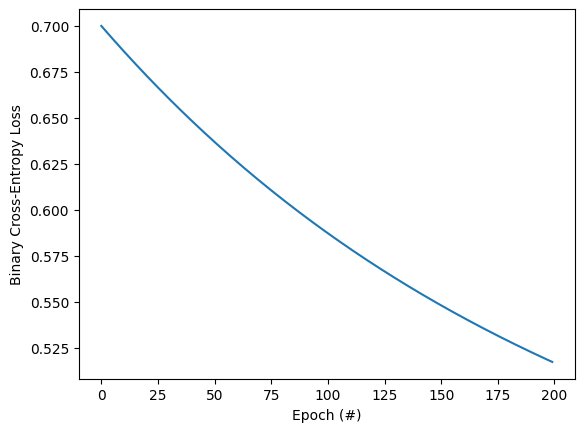

In [15]:
# training loop
num_epochs = 200
loss_lst   = list()

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    loss_lst.append(loss.item()) # append loss
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

plt.plot(loss_lst)
plt.xlabel('Epoch (#)'), plt.ylabel('Binary Cross-Entropy Loss')

In [16]:
with torch.no_grad():
    # on test
    y_predicted = model(X_test)  # no need to call model.forward()
    y_predicted_cls = y_predicted.round()   # round off to nearest class
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])  # accuracy
    print(f'accuracy = {acc:.4f}')

accuracy = 0.8135
